### Kit PyKrige: Kriging Ordinario 3D

**Bibliotecas:**

In [1]:
from pykrige.ok3d import OrdinaryKriging3D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

**Lectura de archivo:**

In [2]:
carpeta = "C:/Users/Heber/Desktop/curso_geopython/dataset_curso/"
archivo = "muestras_cu.csv"

df = pd.read_csv(carpeta + archivo, sep=";")

In [3]:
df.head(1)

,Este [X],Norte [Y],Cota [Z],Ley de Cobre [%],Ley de Oro [ppm],Tipo de roca
0,193.0,528.6,39.0,0.12,0.0,1


**Información básica del dataset:**

In [4]:
print("N° de datos:", df['Ley de Cobre [%]'].shape)

N° de datos: (2380,)


In [5]:
print("xmin:", df['Este [X]'].min(), "xmax:", df['Este [X]'].max(), "ymin:", df['Norte [Y]'].min(), "ymax:", df['Norte [Y]'].max(), "zmin:", df['Cota [Z]'].min(), "zmax:", df['Cota [Z]'].max())

xmin: 0.2 xmax: 399.0 ymin: 2.2 ymax: 598.9 zmin: 6.0 zmax: 136.0


In [6]:
print("Varianza de la ley de cobre:", round(df['Ley de Cobre [%]'].var(),2))

Varianza de la ley de cobre: 0.42


**Conversión de las variables a ndarray:**

In [7]:
x = np.array(df['Este [X]'])
y = np.array(df['Norte [Y]'])
z = np.array(df['Cota [Z]'])
val = np.array(df['Ley de Cobre [%]'])

**Variograma:**

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Using 'spherical' Variogram Model
Partial Sill: 0.2237191577381189
Full Sill: 0.4448786730701004
Range: 161.67206062574257
Nugget: 0.22115951533198153 



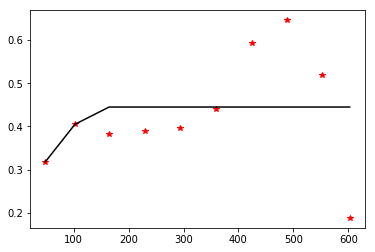

Calculating statistics on variogram model fit...
Q1 = 0.461081892100211
Q2 = 0.7610599838070543
cR = 0.21791687136806986 



In [8]:
ok3d = OrdinaryKriging3D(x,y,z,val,variogram_model='spherical', nlags=10, enable_plotting=True, verbose=True)

**Grid set:**

In [10]:
gridx= np.linspace(0,410, num=41, endpoint=False)
gridy= np.linspace(0,610, num=61, endpoint=False)
gridz= np.linspace(0,150, num=15, endpoint=False)

In [11]:
zg, yg, xg = np.meshgrid(gridz, gridy, gridx, indexing='ij')

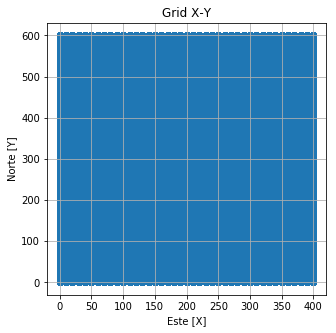

In [12]:
fig = plt.figure(figsize=(5,5))
plot1 = fig.add_subplot(111)
a = plt.scatter(xg,yg)
plt.xlabel("Este [X]")
plt.ylabel("Norte [Y]")
plt.title("Grid X-Y")
plt.grid(True)

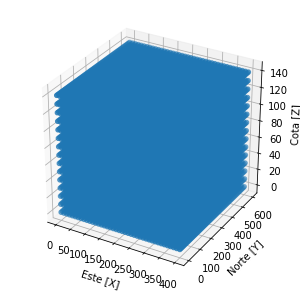

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig3d = plt.figure(figsize=(5,5))
plot3d = fig3d.add_subplot(111, projection='3d')
plot3d.scatter(xg,yg,zg)
plot3d.set_xlabel("Este [X]")
plot3d.set_ylabel("Norte [Y]")
plot3d.set_zlabel("Cota [Z]")
plt.show()

**Kriging Ordinario 3d:**

In [14]:
k3d, ss3d = ok3d.execute('grid', gridx, gridy, gridz)

Executing Ordinary Kriging...



**Salida de la estimación 3d con KO:**

In [24]:
k = k3d.ravel() # devuelve una matriz aplanada contigua.
var_1 = ss3d.ravel()

In [17]:
z_g = zg.ravel()
x_g = xg.ravel()
y_g = yg.ravel()

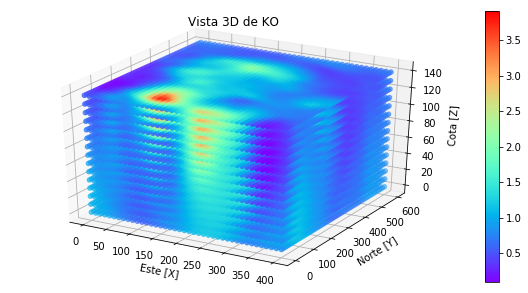

In [22]:
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111, projection='3d')

xs,ys,zs = x_g, y_g, z_g

valores = k

p = ax.scatter3D(xs, ys, zs=zs, c=valores, cmap='rainbow')

ax.set_xlabel("Este [X]")
ax.set_ylabel("Norte [Y]")
ax.set_zlabel("Cota [Z]")

ax.set_title("Vista 3D de KO")
fig.colorbar(p, ax=ax)
plt.show()

In [25]:
d = {'Este [X]': x_g, 'Norte [Y]': y_g, 'Cota [Z]': z_g, 'Cobre_KO': k, 'Varianza': var_1}

df2 = pd.DataFrame(data=d)

df2.head()

,Este [X],Norte [Y],Cota [Z],Cobre_KO,Varianza
0,0.0,0.0,0.0,1.006240,0.405507
1,10.0,0.0,0.0,1.011323,0.396148
2,20.0,0.0,0.0,1.009314,0.386985
3,30.0,0.0,0.0,0.991618,0.378473
4,40.0,0.0,0.0,0.958668,0.370786


In [26]:
df2.to_csv(carpeta + "modelo3d_paraview.csv", index=False)